In [2]:
#import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data from csv file
df = pd.read_csv("../Data/diabetes-data.csv")


In [11]:
#observe the first few rows of the data
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [6]:
#get information about the data, i.e. data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10000 non-null  int64  
 1   Pregnancies             10000 non-null  int64  
 2   PlasmaGlucose           10000 non-null  int64  
 3   DiastolicBloodPressure  10000 non-null  int64  
 4   TricepsThickness        10000 non-null  int64  
 5   SerumInsulin            10000 non-null  int64  
 6   BMI                     10000 non-null  float64
 7   DiabetesPedigree        10000 non-null  float64
 8   Age                     10000 non-null  int64  
 9   Diabetic                10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [7]:
#Get numerical information about the columns 
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


In [13]:
#Check for nulls in the data
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [22]:
#how many patients were diabetic
df.Diabetic.sum()

3344

In [23]:
df.corr()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,1.000000,0.004579,0.004778,0.015062,-0.003760,-0.028858,-0.005280,-0.021706,-0.010009,-0.021959
Pregnancies,0.004579,1.000000,0.055883,0.050251,0.059983,0.115830,0.098109,0.056039,0.144361,0.405161
PlasmaGlucose,0.004778,0.055883,1.000000,0.009093,0.026193,0.028525,0.022023,0.011044,0.036698,0.128800
DiastolicBloodPressure,0.015062,0.050251,0.009093,1.000000,0.002038,0.015653,0.016459,0.015617,0.042873,0.086689
TricepsThickness,-0.003760,0.059983,0.026193,0.002038,1.000000,0.019070,0.029941,-0.003498,0.067439,0.144062
SerumInsulin,-0.028858,0.115830,0.028525,0.015653,0.019070,1.000000,0.047509,0.043459,0.087223,0.244907
BMI,-0.005280,0.098109,0.022023,0.016459,0.029941,0.047509,1.000000,0.028719,0.062703,0.213245
DiabetesPedigree,-0.021706,0.056039,0.011044,0.015617,-0.003498,0.043459,0.028719,1.000000,0.059280,0.171613
Age,-0.010009,0.144361,0.036698,0.042873,0.067439,0.087223,0.062703,0.059280,1.000000,0.356701
Diabetic,-0.021959,0.405161,0.128800,0.086689,0.144062,0.244907,0.213245,0.171613,0.356701,1.000000


<AxesSubplot:>

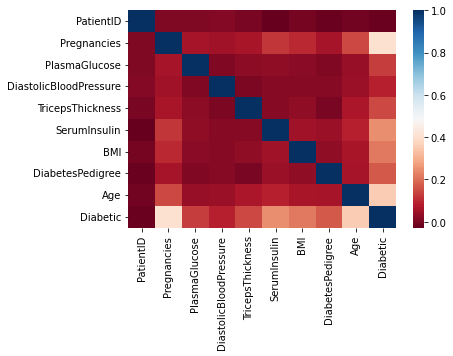

In [25]:
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, cmap="RdBu")

In [26]:
from sklearn.model_selection import train_test_split

In [42]:
y = df["Diabetic"]
X = df.drop(["Diabetic"], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr= LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
print(round(lr.score(X_test, y_test)*100,2),'%')


65.1 %
